In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sbn
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error,mean_squared_error
dataFrame = pd.read_excel("bisiklet_fiyatlari.xlsx")
y = dataFrame["Fiyat"].values
x = dataFrame[["BisikletOzellik1","BisikletOzellik2"]].values
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.33,random_state=15)
scaler = MinMaxScaler()
scaler.fit(x_train)
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)
model = Sequential()
model.add(Dense(4,activation="relu"))
model.add(Dense(4,activation="relu"))
model.add(Dense(4,activation="relu"))

model.add(Dense(1))

model.compile(optimizer = "rmsprop",loss = "mse")
model.fit(x_train,y_train,epochs=250)

Epoch 1/250
21/21 [==============================] - 0s 1ms/step - loss: 795910.6250
Epoch 2/250
21/21 [==============================] - 0s 1ms/step - loss: 795860.3125
Epoch 3/250
21/21 [==============================] - 0s 1ms/step - loss: 795823.1250
Epoch 4/250
21/21 [==============================] - 0s 1ms/step - loss: 795786.0625
Epoch 5/250
21/21 [==============================] - 0s 1ms/step - loss: 795749.4375
Epoch 6/250
21/21 [==============================] - 0s 1ms/step - loss: 795712.6875
Epoch 7/250
21/21 [==============================] - 0s 1ms/step - loss: 795675.8125
Epoch 8/250
21/21 [==============================] - 0s 1ms/step - loss: 795639.0000
Epoch 9/250
21/21 [==============================] - 0s 1ms/step - loss: 795602.3125
Epoch 10/250
21/21 [==============================] - 0s 1ms/step - loss: 795565.4375
Epoch 11/250
21/21 [==============================] - 0s 1ms/step - loss: 795528.6250
Epoch 12/250
21/21 [==============================] - 0s 1ms/st

21/21 [==============================] - 0s 1ms/step - loss: 792403.3125
Epoch 97/250
21/21 [==============================] - 0s 1ms/step - loss: 792366.6250
Epoch 98/250
21/21 [==============================] - 0s 2ms/step - loss: 792329.8750
Epoch 99/250
21/21 [==============================] - 0s 2ms/step - loss: 792293.1250
Epoch 100/250
21/21 [==============================] - 0s 2ms/step - loss: 792256.5000
Epoch 101/250
21/21 [==============================] - 0s 1ms/step - loss: 792219.8125
Epoch 102/250
21/21 [==============================] - 0s 1ms/step - loss: 792183.0000
Epoch 103/250
21/21 [==============================] - 0s 1ms/step - loss: 792146.2500
Epoch 104/250
21/21 [==============================] - 0s 1ms/step - loss: 792109.5000
Epoch 105/250
21/21 [==============================] - 0s 1ms/step - loss: 792073.0000
Epoch 106/250
21/21 [==============================] - 0s 1ms/step - loss: 792036.1250
Epoch 107/250
21/21 [==============================] - 0s 1m

21/21 [==============================] - 0s 1ms/step - loss: 788954.8125
Epoch 191/250
21/21 [==============================] - 0s 1ms/step - loss: 788918.1875
Epoch 192/250
21/21 [==============================] - 0s 1ms/step - loss: 788881.5000
Epoch 193/250
21/21 [==============================] - 0s 1ms/step - loss: 788845.0625
Epoch 194/250
21/21 [==============================] - 0s 1ms/step - loss: 788808.1875
Epoch 195/250
21/21 [==============================] - 0s 1ms/step - loss: 788771.5000
Epoch 196/250
21/21 [==============================] - 0s 1ms/step - loss: 788735.0625
Epoch 197/250
21/21 [==============================] - 0s 1ms/step - loss: 788698.3750
Epoch 198/250
21/21 [==============================] - 0s 1ms/step - loss: 788661.5000
Epoch 199/250
21/21 [==============================] - 0s 1ms/step - loss: 788625.0000
Epoch 200/250
21/21 [==============================] - 0s 1ms/step - loss: 788588.3750
Epoch 201/250
21/21 [==============================] - 0s

In [25]:
loss = model.history.history["loss"]
sbn.lineplot(x=range(len(loss)),y=loss)

KeyError: 'loss'

In [16]:
trainLoss = model.evaluate(x_train,y_train,verbose = 0)
testLoss = model.evaluate(x_test,y_test,verbose = 0)
print(trainLoss)
print()
print(testLoss)

73.36589050292969

78.68270874023438


11/11 [==============================] - 0s 1ms/step


<AxesSubplot: xlabel='Gercek Y', ylabel='Tahmin Y'>

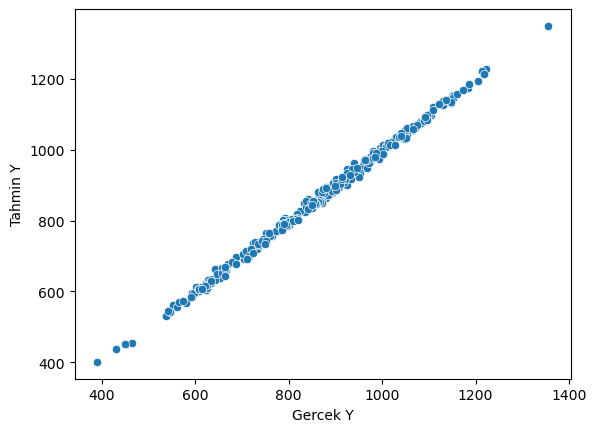

In [17]:
testGuess = model.predict(x_test)
guessTf = pd.DataFrame(y_test,columns=["Gercek Y"])
testGuess = pd.Series(testGuess.reshape(330,))
guessTf = pd.concat([guessTf,testGuess],axis=1)
guessTf.columns = ["Gercek Y","Tahmin Y"]
sbn.scatterplot(x="Gercek Y",y = "Tahmin Y",data = guessTf)

In [18]:
from sklearn.metrics import mean_absolute_error,mean_squared_error
mean_absolute_error(guessTf["Gercek Y"],guessTf["Tahmin Y"])


7.10458134253906

In [19]:
mean_squared_error(guessTf["Gercek Y"],guessTf["Tahmin Y"])

78.68272214289364

In [26]:
dataFrame.describe()

,Fiyat,BisikletOzellik1,BisikletOzellik2
count,1000.000000,1000.000000,1000.000000
mean,872.677801,1750.024800,1749.964733
std,164.124504,1.704531,1.659578
min,390.856887,1744.852108,1744.742389
25%,757.795031,1748.831119,1748.803186
50%,879.168705,1750.017350,1750.003926
75%,988.612778,1751.115765,1751.129414
max,1355.213745,1755.613884,1754.666038


In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sbn
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error,mean_squared_error
from tensorflow.keras.models import load_model
scaler = MinMaxScaler()
scaler.fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)
newCycle = [[1751,1750]]
newCycle = scaler.transform(newCycle)
model.predict(newCycle)
model.save("cycle_model.h5")
latercall = load_model("cycle_model.h5")
latercall.predict(newCycle)


1/1 [==============================] - 0s 40ms/step


array([[2246807.8]], dtype=float32)